In [1]:
import pandas as pd
import numpy as np

In [3]:
#load the data
pd.set_option("display.max_colwidth",63)
blog=pd.read_csv("Downloads/blogs.csv")
print(blog.head(5))

                                                             Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!n...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv.cs.cmu.edu!cr...  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.ne...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!n...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53485 talk.reli...  alt.atheism


In [5]:
#convert lowercase
import string
blog["Data"]=blog["Data"].str.lower()
blog["Labels"]=blog["Labels"].str.lower()
print(blog.head(5))

                                                             Data       Labels
0  path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!n...  alt.atheism
1  newsgroups: alt.atheism\npath: cantaloupe.srv.cs.cmu.edu!cr...  alt.atheism
2  path: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.ne...  alt.atheism
3  path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!n...  alt.atheism
4  xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53485 talk.reli...  alt.atheism


In [7]:
#remove special characters
import re
def remove_spl(text):
    text=re.sub("[^a-zA-Z0-9]"," ",text)
    return text
blog["Data"]=blog["Data"].apply(lambda x:remove_spl(x))
blog["Labels"]=blog["Labels"].apply(lambda x:remove_spl(x))
print(blog.tail(5))  

                                                                Data  \
1995  xref  cantaloupe srv cs cmu edu talk abortion 120945 alt at...   
1996  xref  cantaloupe srv cs cmu edu talk religion misc 83767 ta...   
1997  xref  cantaloupe srv cs cmu edu talk origins 41030 talk rel...   
1998  xref  cantaloupe srv cs cmu edu talk religion misc 83602 al...   
1999  xref  cantaloupe srv cs cmu edu sci skeptic 43561 talk poli...   

                  Labels  
1995  talk religion misc  
1996  talk religion misc  
1997  talk religion misc  
1998  talk religion misc  
1999  talk religion misc  


In [9]:
#remove URL
def remove_url(text):
    return re.sub(r"https?://\s+|www\.\S+","",text)
blog["Data"]=blog["Data"].apply(lambda x:remove_url(x))
print(blog.head(5)) 

                                                             Data       Labels
0  path  cantaloupe srv cs cmu edu magnesium club cc cmu edu n...  alt atheism
1  newsgroups  alt atheism path  cantaloupe srv cs cmu edu cra...  alt atheism
2  path  cantaloupe srv cs cmu edu das news harvard edu noc ne...  alt atheism
3  path  cantaloupe srv cs cmu edu magnesium club cc cmu edu n...  alt atheism
4  xref  cantaloupe srv cs cmu edu alt atheism 53485 talk reli...  alt atheism


In [11]:
#remove of HTML tags
def remove_tag(text):
    return re.sub(r"<.*?>","",text)
blog["Data"]=blog["Data"].apply(lambda x:remove_tag(x))
print(blog.head(5))

                                                             Data       Labels
0  path  cantaloupe srv cs cmu edu magnesium club cc cmu edu n...  alt atheism
1  newsgroups  alt atheism path  cantaloupe srv cs cmu edu cra...  alt atheism
2  path  cantaloupe srv cs cmu edu das news harvard edu noc ne...  alt atheism
3  path  cantaloupe srv cs cmu edu magnesium club cc cmu edu n...  alt atheism
4  xref  cantaloupe srv cs cmu edu alt atheism 53485 talk reli...  alt atheism


In [17]:
#Remove punctuation
from nltk.corpus import stopwords
import string
def text_cleaning(txt):
    txt_nopunc="".join([c for c in txt if c not in string.punctuation])
    return [word for word in txt_nopunc.split() if word.lower() not in stopwords.words("english")]

print(blog.iloc[:,0].apply(text_cleaning))

0       [path, cantaloupe, srv, cs, cmu, edu, magnesium, club, cc, ...
1       [newsgroups, alt, atheism, path, cantaloupe, srv, cs, cmu, ...
2       [path, cantaloupe, srv, cs, cmu, edu, das, news, harvard, e...
3       [path, cantaloupe, srv, cs, cmu, edu, magnesium, club, cc, ...
4       [xref, cantaloupe, srv, cs, cmu, edu, alt, atheism, 53485, ...
                                     ...                              
1995    [xref, cantaloupe, srv, cs, cmu, edu, talk, abortion, 12094...
1996    [xref, cantaloupe, srv, cs, cmu, edu, talk, religion, misc,...
1997    [xref, cantaloupe, srv, cs, cmu, edu, talk, origins, 41030,...
1998    [xref, cantaloupe, srv, cs, cmu, edu, talk, religion, misc,...
1999    [xref, cantaloupe, srv, cs, cmu, edu, sci, skeptic, 43561, ...
Name: Data, Length: 2000, dtype: object


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transform=CountVectorizer(analyzer=text_cleaning).fit(blog["Data"])
bow_transform.vocabulary_

{'path': 36792,
 'cantaloupe': 16269,
 'srv': 43822,
 'cs': 18967,
 'cmu': 17506,
 'edu': 21798,
 'magnesium': 32137,
 'club': 17451,
 'cc': 16562,
 'news': 34839,
 'sei': 42109,
 'cis': 17202,
 'ohio': 35748,
 'state': 43971,
 'zaphod': 50405,
 'mps': 34010,
 'howland': 27138,
 'reston': 40502,
 'ans': 12188,
 'net': 34753,
 'agate': 11494,
 'doc': 20979,
 'ic': 27532,
 'ac': 11008,
 'uk': 47061,
 'uknet': 47069,
 'mcsun': 32773,
 'germany': 25049,
 'eu': 22758,
 'thoth': 45814,
 'mchp': 32732,
 'sni': 43226,
 'de': 19628,
 'horus': 27075,
 'ap': 12278,
 'd012s658': 19269,
 'frank': 24354,
 'uucp': 47813,
 'dwyer': 21511,
 'newsgroups': 34855,
 'alt': 11852,
 'atheism': 12892,
 'subject': 44430,
 'islamic': 28848,
 'genocide': 24987,
 'date': 19502,
 '23': 5115,
 'apr': 12418,
 '1993': 3487,
 '51': 7492,
 '47': 7188,
 'gmt': 25271,
 'organization': 36060,
 'siemens': 42732,
 'nixdorf': 35039,
 'ag': 11486,
 'lines': 31332,
 '110': 1021,
 'distribution': 20842,
 'world': 49534,
 'messa

In [21]:
title_bow=bow_transform.transform(blog["Data"])
print(title_bow)

  (0, 1021)	1
  (0, 3487)	1
  (0, 4154)	2
  (0, 4169)	2
  (0, 4195)	2
  (0, 4245)	1
  (0, 5115)	2
  (0, 7188)	1
  (0, 7492)	1
  (0, 8024)	1
  (0, 8716)	2
  (0, 9500)	2
  (0, 10982)	2
  (0, 10989)	1
  (0, 11008)	1
  (0, 11036)	1
  (0, 11202)	1
  (0, 11486)	1
  (0, 11494)	1
  (0, 11530)	1
  (0, 11800)	1
  (0, 11804)	3
  (0, 11849)	3
  (0, 11852)	1
  (0, 12188)	1
  :	:
  (1999, 47738)	1
  (1999, 47760)	1
  (1999, 47823)	1
  (1999, 47978)	1
  (1999, 48156)	1
  (1999, 48352)	1
  (1999, 48355)	1
  (1999, 48373)	1
  (1999, 48724)	1
  (1999, 48726)	1
  (1999, 48794)	1
  (1999, 48826)	5
  (1999, 48829)	1
  (1999, 48907)	1
  (1999, 48956)	1
  (1999, 48988)	1
  (1999, 49430)	1
  (1999, 49559)	1
  (1999, 49565)	2
  (1999, 49580)	1
  (1999, 49600)	1
  (1999, 49623)	2
  (1999, 49632)	1
  (1999, 49974)	1
  (1999, 50195)	1


In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tdf=TfidfTransformer().fit(title_bow)
title_tdf=tdf.transform(title_bow)
print(title_tdf)
print(title_tdf.shape)

  (0, 50405)	0.010861653419276182
  (0, 50190)	0.02088829048234859
  (0, 49623)	0.027933904998096736
  (0, 49582)	0.06419492945573954
  (0, 49540)	0.039672226478814306
  (0, 49534)	0.015390793614885668
  (0, 49511)	0.016934720950756484
  (0, 49498)	0.021735393860240187
  (0, 49387)	0.0184918685618515
  (0, 49361)	0.025296095857562366
  (0, 49121)	0.02213373102011465
  (0, 49096)	0.023025597982273553
  (0, 49026)	0.01485143513628848
  (0, 48837)	0.03272855612363894
  (0, 48789)	0.06360093248840755
  (0, 48357)	0.03077194006479693
  (0, 48213)	0.01969722234067941
  (0, 47990)	0.025296095857562366
  (0, 47813)	0.03994475607242163
  (0, 47800)	0.03633714004482834
  (0, 47689)	0.08055202172936415
  (0, 47378)	0.1346137096445174
  (0, 47270)	0.03031777979808525
  (0, 47069)	0.024460179211412744
  (0, 47061)	0.05899124240675396
  :	:
  (1999, 11084)	0.03419997626370108
  (1999, 11037)	0.02912469100023768
  (1999, 10449)	0.04233391867427978
  (1999, 10352)	0.08466783734855957
  (1999, 10198)	0

In [25]:
x=title_tdf
y=blog["Labels"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [27]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(x_train,y_train)
print(model)

MultinomialNB()


In [29]:
all_prediction=model.predict(x_test)
print(all_prediction)

['comp sys mac hardware' 'sci crypt' 'sci crypt' 'rec autos'
 'talk politics mideast' 'sci crypt' 'soc religion christian' 'sci med'
 'talk politics misc' 'alt atheism' 'sci electronics'
 'soc religion christian' 'comp os ms windows misc' 'comp graphics'
 'rec autos' 'talk politics misc' 'comp windows x' 'talk religion misc'
 'soc religion christian' 'comp sys ibm pc hardware' 'alt atheism'
 'sci electronics' 'rec autos' 'soc religion christian' 'rec sport hockey'
 'sci med' 'comp sys ibm pc hardware' 'sci crypt' 'sci crypt'
 'talk politics guns' 'sci electronics' 'sci crypt'
 'soc religion christian' 'talk politics mideast' 'rec sport hockey'
 'comp sys mac hardware' 'rec sport hockey' 'comp graphics'
 'comp sys mac hardware' 'rec sport baseball' 'alt atheism' 'sci med'
 'talk politics mideast' 'alt atheism' 'talk politics guns'
 'comp graphics' 'comp sys ibm pc hardware' 'comp os ms windows misc'
 'talk politics mideast' 'sci crypt' 'soc religion christian' 'sci med'
 'talk religion 

In [31]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix
print("The confusion matrix are:")
a=confusion_matrix(y_test,all_prediction)
print(a)

The confusion matrix are:
[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  1  9]
 [ 0 15  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 23  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  4 11  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  5  1  0  0 14  1  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 14  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0 20  0  0  0  0  0  0  1  0]
 [ 0  1  1  2  0  0  2  0  0  0  0  1 14  0  0  0  0  1  0  0]
 [ 0  0  0  0  1  0  2  0  0  0  1  1  0 15  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0 16  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 

In [33]:
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
print("The classification report")
b=classification_report(y_test,all_prediction)
print(b)

The classification report
                          precision    recall  f1-score   support

             alt atheism       0.76      0.57      0.65        28
           comp graphics       0.68      0.83      0.75        18
 comp os ms windows misc       0.92      0.96      0.94        24
comp sys ibm pc hardware       0.63      0.94      0.76        18
   comp sys mac hardware       0.79      0.58      0.67        19
          comp windows x       0.93      0.64      0.76        22
            misc forsale       0.62      0.94      0.75        16
               rec autos       0.91      1.00      0.95        21
         rec motorcycles       1.00      0.89      0.94        18
      rec sport baseball       1.00      0.88      0.93        16
        rec sport hockey       0.89      0.94      0.92        18
               sci crypt       0.87      0.91      0.89        22
         sci electronics       0.93      0.64      0.76        22
                 sci med       1.00      0.68    

In [35]:
from sklearn.metrics import accuracy_score
print("the accuracy score:")
accuracy=accuracy_score(y_test,all_prediction)
print(accuracy)

the accuracy score:
0.8075


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import ast
plt.style.use("fivethirtyeight")
cp=sns.color_palette()

In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [41]:
#generating sentiment for all the sentences
emptyline=[]
for row in blog["Data"]:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

#create new dataframe with sentiments
df_sentiment=pd.DataFrame(emptyline)
print(df_sentiment)

        neg    neu    pos  compound
0     0.131  0.780  0.090   -0.9964
1     0.007  0.928  0.064    0.8488
2     0.156  0.803  0.041   -0.9974
3     0.184  0.719  0.096   -0.9999
4     0.035  0.887  0.078    0.9673
...     ...    ...    ...       ...
1995  0.055  0.850  0.095    0.9914
1996  0.026  0.906  0.068    0.8749
1997  0.000  0.925  0.075    0.9618
1998  0.043  0.835  0.122    0.9945
1999  0.118  0.799  0.083   -0.9900

[2000 rows x 4 columns]


In [51]:
text=" " .join(blog["Data"])
len(text)

4651955

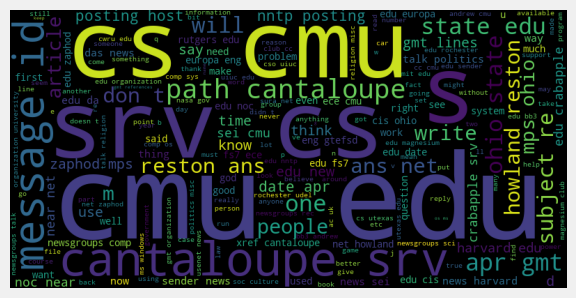

In [53]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(width=800,height=400).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()